# EDA analysis on the Bolivian Financial System Interest Rates

In [1]:
# data mining and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import rcParams
import seaborn as sns 

#estilo de las visualizaciones
#plt.style.use("ggplot")
#rcParams['figure.figsize'] = (12, 6)


### 1. Extracting the data

This dataset contains the weekly summary of the interest rates both active and passive reported by the Bolivian 
financial institutions to the Bolivian Central Bank.
Source: https://www.bcb.gob.bo/webdocs/tasas_interes 

In [2]:
#reading the xml file provided by the Central Bank, from the 2nd week of June, 2023
df = pd.read_excel("PUBLICACION 2023 06 18 TASAS ACT Y PAS.xlsx", sheet_name="PAS", na_values=['NA', 0])


In [3]:
df.head()

,Unnamed: 0,Entidad,ahorroB,30b,60b,90b,180b,360b,720b,1080b,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,BANCOS MÚLTIPLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NACIONAL DE BOLIVIA,1.929171,0.115427,0.25131,NaN,1.507500,4.134283,2.867602,3.3694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,MERCANTIL SANTA CRUZ,1.549590,0.180000,0.39038,NaN,1.888729,3.190097,4.583262,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Data Cleansing and Data Mining
#### Removing rows and columns with NaN only


In [4]:
df = df.dropna(axis=0, how='all') #rows NaN
df = df.dropna(axis=1, how='all')# columns NaN

In [5]:
df.head()

,Entidad,ahorroB,30b,60b,90b,180b,360b,720b,1080b,Mayorb,ahorroUsd,30Usd,60Usd,90Usd,180Usd,360Usd,720Usd,1080Usd,MayorUsd,Unnamed: 35
1,BANCOS MÚLTIPLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NACIONAL DE BOLIVIA,1.929171,0.115427,0.251310,NaN,1.507500,4.134283,2.867602,3.3694,NaN,0.0100,0.01,0.01,NaN,0.07,0.133205,0.210000,NaN,NaN,NaN
4,MERCANTIL SANTA CRUZ,1.549590,0.180000,0.390380,NaN,1.888729,3.190097,4.583262,NaN,NaN,NaN,0.01,0.01,NaN,0.01,NaN,0.960597,NaN,NaN,NaN
5,CRÉDITO DE BOLIVIA,0.431098,0.046430,0.117885,NaN,3.530600,NaN,NaN,NaN,NaN,0.0001,0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BISA,1.753244,0.032046,0.216280,NaN,NaN,3.012100,3.950077,NaN,NaN,NaN,0.01,0.01,NaN,0.08,NaN,NaN,NaN,NaN,NaN


#### Removing rows that contain categorical values as subaggregates 


In [6]:
#categorical_df = df[df['ahorroB'].isna()]
df = df.dropna(subset=['ahorroB'])
df.head()

,Entidad,ahorroB,30b,60b,90b,180b,360b,720b,1080b,Mayorb,ahorroUsd,30Usd,60Usd,90Usd,180Usd,360Usd,720Usd,1080Usd,MayorUsd,Unnamed: 35
3,NACIONAL DE BOLIVIA,1.929171,0.115427,0.251310,NaN,1.507500,4.134283,2.867602,3.36940,NaN,0.0100,0.01,0.01,NaN,0.07,0.133205,0.210000,NaN,NaN,NaN
4,MERCANTIL SANTA CRUZ,1.549590,0.180000,0.390380,NaN,1.888729,3.190097,4.583262,NaN,NaN,NaN,0.01,0.01,NaN,0.01,NaN,0.960597,NaN,NaN,NaN
5,CRÉDITO DE BOLIVIA,0.431098,0.046430,0.117885,NaN,3.530600,NaN,NaN,NaN,NaN,0.0001,0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BISA,1.753244,0.032046,0.216280,NaN,NaN,3.012100,3.950077,NaN,NaN,NaN,0.01,0.01,NaN,0.08,NaN,NaN,NaN,NaN,NaN
7,UNIÓN,0.154201,0.085047,0.149656,NaN,NaN,4.544670,5.047221,5.04158,NaN,0.0100,0.01,0.01,0.04,NaN,NaN,2.277748,NaN,NaN,NaN


Deleting any left useless columns or rows

In [7]:
df = df.drop('Unnamed: 35', axis=1)


#### Find duplicates

In [8]:
duplicates = df[df.duplicated('Entidad', keep=False)]

# Display the duplicate rows
print(duplicates)

     Entidad   ahorroB     30b  60b       90b    180b      360b      720b  \
30  PROGRESO  2.018400  0.1801  NaN  2.118602  2.1166  2.212100  4.050595   
62  PROGRESO  1.997819  0.2503  NaN       NaN  2.0184  3.670794  5.594537   

     1080b  Mayorb  ahorroUsd   30Usd  60Usd  90Usd  180Usd  360Usd  720Usd  \
30     NaN     NaN        NaN  0.0100    NaN    NaN     NaN     NaN     NaN   
62  6.3792  7.9777        NaN  0.0501    NaN    NaN     NaN     NaN  1.5104   

    1080Usd  MayorUsd  
30      NaN       NaN  
62      NaN       NaN  


Data shows that there is both a Housing Financial Institution and a "Cooperativa Financial Institution" called PROGRESO. 
For that reason,the second one's name is going to be changed to diffentiate them.

In [9]:
#The duplicate is located in the row 62
row_index = 62
column_name = 'Entidad'
new_value = 'PROGRESO COOP' 
df.at[row_index, column_name] = new_value


#### Reassign available categorical variables using a dictionary

Dictionary

In [10]:
# Create a dictionary with variables as keys and their corresponding categories
# Blending 'MICROFINANZAS MULTIPLE' and 'MICROFINANZAS PYME' into a single category
category_dict = {
    'BANCOS MÚLTIPLES': ['NACIONAL DE BOLIVIA', 'MERCANTIL SANTA CRUZ','CRÉDITO DE BOLIVIA','BISA','UNIÓN','ECONÓMICO','GANADERO','NACIÓN ARGENTINA'],
    'MICROFINANZAS': ['SOLIDARIO', 'FIE','FORTALEZA','PRODEM','DE LA COMUNIDAD','ECO FUTURO'],
     'ENTIDADES FINANCIERAS DE VIVIENDA': ['LA PRIMERA','PROMOTORA','PROGRESO'],
    'COOPERATIVAS': ['JESÚS  NAZARENO','SAN MARTÍN DE PORRES','FÁTIMA','LA MERCED','SAN PEDRO','LOYOLA','CAT. TARIJA','SAN ANTONIO','PIO X','INCAHUASSI','QUILLACOLLO','S.J. PUNATA','TRINIDAD','COMARAPA','SAN ROQUE','SAN MATEO','CHOROLQUE','M. F. GAINZA','MADRE Y MAESTRA','E. G. CHACO','CAT. POTOSÍ','ASUNCIÓN','S. J. BERMEJO','MAG. RURAL',
'SAN JOAQUÍN','S.C BORROMEO','CACEF','LA SAGRADA FAMILIA','PROGRESO COOP','MAG RURAL CHUQUISACA','SAN PEDRO DE AIQUILE','SAN MARTIN','CRISTO REY CBBA','VIRGEN DE LOS REMEDIOS',
'SAN FRANCISCO SOLANO','SOLUCREDIT SAN SILVESTRE','COOPROLE','PAULO VI','HOSPICIO','CANTERA'],
    'IFDS': ['IFD CIDRE','IFD CRECER','IFD DIACONÍA','IFD FONDECO','IFD FUBODE','IFD IDEPRO','IFD IMPRO','IFD PROMUJER','IFD SARTAWI']
    
}

In [11]:
# Create a function to perform the reverse mapping
def get_category(row):
    for category, elements in category_dict.items():
        if row in elements:
            return category
    return None

# Step 5: Apply the function to create the new column
df['Tipo'] = df['Entidad'].apply(get_category).astype('category')

# Display the updated dataframe
df

,Entidad,ahorroB,30b,60b,90b,180b,360b,720b,1080b,Mayorb,ahorroUsd,30Usd,60Usd,90Usd,180Usd,360Usd,720Usd,1080Usd,MayorUsd,Tipo
3,NACIONAL DE BOLIVIA,1.929171,0.115427,0.251310,NaN,1.507500,4.134283,2.867602,3.369400,NaN,0.0100,0.010000,0.010000,NaN,0.0700,0.133205,0.210000,NaN,NaN,BANCOS MÚLTIPLES
4,MERCANTIL SANTA CRUZ,1.549590,0.180000,0.390380,NaN,1.888729,3.190097,4.583262,NaN,NaN,NaN,0.010000,0.010000,NaN,0.0100,NaN,0.960597,NaN,NaN,BANCOS MÚLTIPLES
5,CRÉDITO DE BOLIVIA,0.431098,0.046430,0.117885,NaN,3.530600,NaN,NaN,NaN,NaN,0.0001,0.010000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN,BANCOS MÚLTIPLES
6,BISA,1.753244,0.032046,0.216280,NaN,NaN,3.012100,3.950077,NaN,NaN,NaN,0.010000,0.010000,NaN,0.0800,NaN,NaN,NaN,NaN,BANCOS MÚLTIPLES
7,UNIÓN,0.154201,0.085047,0.149656,NaN,NaN,4.544670,5.047221,5.041580,NaN,0.0100,0.010000,0.010000,0.0400,NaN,NaN,2.277748,NaN,NaN,BANCOS MÚLTIPLES
8,ECONÓMICO,1.087249,0.065127,0.201116,1.205500,1.505600,3.002686,4.160196,NaN,5.600000,NaN,0.010000,0.010000,NaN,0.1000,NaN,NaN,NaN,NaN,BANCOS MÚLTIPLES
9,GANADERO,1.604116,0.050686,0.070014,NaN,4.974312,2.000200,NaN,NaN,5.400000,0.0100,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,BANCOS MÚLTIPLES
16,SOLIDARIO,2.121778,0.162463,0.397392,6.970803,7.138202,6.195509,6.487445,NaN,3.937011,0.0100,0.026663,0.037638,NaN,NaN,0.300200,0.400000,NaN,NaN,MICROFINANZAS
17,FIE,1.973674,0.129144,0.271320,1.205745,1.507443,5.343773,5.397500,5.334784,NaN,0.0300,0.010000,0.020000,NaN,NaN,0.800000,1.399900,NaN,NaN,MICROFINANZAS
18,FORTALEZA,4.072932,0.120512,NaN,1.205400,4.028015,4.271909,5.888084,5.811900,5.632737,0.5011,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROFINANZAS


#### Add appropriate index (if needed) to the dataframe

In [12]:
# Establecer el índice al nombre de la entidad
df.set_index("Entidad", inplace=True)

# Mostrar el DataFrame con el índice cambiado

In [13]:
df.head()


,ahorroB,30b,60b,90b,180b,360b,720b,1080b,Mayorb,ahorroUsd,30Usd,60Usd,90Usd,180Usd,360Usd,720Usd,1080Usd,MayorUsd,Tipo
Entidad,,,,,,,,,,,,,,,,,,,
NACIONAL DE BOLIVIA,1.929171,0.115427,0.251310,NaN,1.507500,4.134283,2.867602,3.36940,NaN,0.0100,0.01,0.01,NaN,0.07,0.133205,0.210000,NaN,NaN,BANCOS MÚLTIPLES
MERCANTIL SANTA CRUZ,1.549590,0.180000,0.390380,NaN,1.888729,3.190097,4.583262,NaN,NaN,NaN,0.01,0.01,NaN,0.01,NaN,0.960597,NaN,NaN,BANCOS MÚLTIPLES
CRÉDITO DE BOLIVIA,0.431098,0.046430,0.117885,NaN,3.530600,NaN,NaN,NaN,NaN,0.0001,0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,BANCOS MÚLTIPLES
BISA,1.753244,0.032046,0.216280,NaN,NaN,3.012100,3.950077,NaN,NaN,NaN,0.01,0.01,NaN,0.08,NaN,NaN,NaN,NaN,BANCOS MÚLTIPLES
UNIÓN,0.154201,0.085047,0.149656,NaN,NaN,4.544670,5.047221,5.04158,NaN,0.0100,0.01,0.01,0.04,NaN,NaN,2.277748,NaN,NaN,BANCOS MÚLTIPLES


###                                    3. Dataset Summary


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, NACIONAL DE BOLIVIA to IFD PROMUJER
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ahorroB    60 non-null     float64 
 1   30b        57 non-null     float64 
 2   60b        25 non-null     float64 
 3   90b        26 non-null     float64 
 4   180b       40 non-null     float64 
 5   360b       43 non-null     float64 
 6   720b       51 non-null     float64 
 7   1080b      17 non-null     float64 
 8   Mayorb     20 non-null     float64 
 9   ahorroUsd  24 non-null     float64 
 10  30Usd      40 non-null     float64 
 11  60Usd      19 non-null     float64 
 12  90Usd      8 non-null      float64 
 13  180Usd     15 non-null     float64 
 14  360Usd     13 non-null     float64 
 15  720Usd     19 non-null     float64 
 16  1080Usd    1 non-null      float64 
 17  MayorUsd   2 non-null      float64 
 18  Tipo       60 non-null     category
dtypes: categ

##### Boliviano Currency: 
    ahorroB: Interest rate expressed in annual terms paid on savings accounts in the local currency
    30b-Mayorb: Interest rate expressed in annual terms paid on Fixed-Term Deposits (ex: 30b is a 30 day deposit)
##### US dollar Currency: 
     ahorroUsd: Interest rate expressed in annual terms paid on US dollar savings accounts
    30Usd-MayorUsd: Interest rate expressed in annual terms paid on Fixed-Term Deposits (ex: 30b is a 30 day deposit)

Getting the mean, standard deviation, minimun, maximun and quartile values for all columns

In [15]:
df.describe()

,ahorroB,30b,60b,90b,180b,360b,720b,1080b,Mayorb,ahorroUsd,30Usd,60Usd,90Usd,180Usd,360Usd,720Usd,1080Usd,MayorUsd
count,60.000000,57.000000,25.000000,26.000000,40.000000,43.000000,51.000000,17.000000,20.000000,24.000000,40.000000,19.000000,8.000000,15.000000,13.000000,19.000000,1.0000,2.000000
mean,1.975032,0.449516,0.666278,2.615178,3.765424,5.126727,5.979566,6.551899,7.038878,0.176608,0.141087,0.232649,0.748262,0.870327,1.775516,2.166426,0.7022,3.945250
std,0.889666,0.695410,0.831809,1.571893,1.477863,1.478426,1.139693,1.244633,1.195995,0.253815,0.183822,0.469037,1.026642,1.016545,1.717684,1.392217,NaN,0.549493
min,0.016977,0.032046,0.070014,1.205400,1.505600,2.000200,2.867602,3.369400,3.937011,0.000100,0.010000,0.010000,0.040000,0.010000,0.100000,0.200000,0.7022,3.556700
25%,1.858799,0.180100,0.216280,1.508500,2.616448,4.203096,5.442628,6.167800,6.365900,0.010000,0.010000,0.010000,0.050075,0.075000,0.300200,1.444400,0.7022,3.750975
50%,2.018400,0.180100,0.400791,2.321051,3.875072,5.116300,6.111413,6.697100,7.362450,0.100000,0.050100,0.037638,0.300350,0.500600,1.000000,1.800000,0.7022,3.945250
75%,2.018800,0.501100,0.501200,3.420075,4.593900,6.136766,6.772757,7.229000,7.968833,0.150100,0.162700,0.175150,1.055200,1.004700,3.011586,3.178051,0.7022,4.139525
max,5.401831,3.556700,3.814784,7.200391,7.687884,9.109600,8.363997,8.595550,8.627572,1.004700,0.551400,2.018400,3.033900,3.556700,4.508236,4.711319,0.7022,4.333800


#### Partition of relevant data
In this case, there are very few products offered in dollars, which is why we will subset the dataframe including 
all products in the Bolivian currency, and include only both the USD savings rate, and the 30 day Fixed-Term Deposit.
As well, only columns with at least 25 observations will be now considered

In [16]:
#Non relevant: Last 7 columns before the last one
subset_df = df.iloc[:, :-8]
#at least 25 observations
min_observations = 24
subset_df = df.loc[:, df.count() >= min_observations]
# Display the subset DataFrame
subset_df

,ahorroB,30b,60b,90b,180b,360b,720b,ahorroUsd,30Usd,Tipo
Entidad,,,,,,,,,,
NACIONAL DE BOLIVIA,1.929171,0.115427,0.251310,NaN,1.507500,4.134283,2.867602,0.0100,0.010000,BANCOS MÚLTIPLES
MERCANTIL SANTA CRUZ,1.549590,0.180000,0.390380,NaN,1.888729,3.190097,4.583262,NaN,0.010000,BANCOS MÚLTIPLES
CRÉDITO DE BOLIVIA,0.431098,0.046430,0.117885,NaN,3.530600,NaN,NaN,0.0001,0.010000,BANCOS MÚLTIPLES
BISA,1.753244,0.032046,0.216280,NaN,NaN,3.012100,3.950077,NaN,0.010000,BANCOS MÚLTIPLES
UNIÓN,0.154201,0.085047,0.149656,NaN,NaN,4.544670,5.047221,0.0100,0.010000,BANCOS MÚLTIPLES
ECONÓMICO,1.087249,0.065127,0.201116,1.205500,1.505600,3.002686,4.160196,NaN,0.010000,BANCOS MÚLTIPLES
GANADERO,1.604116,0.050686,0.070014,NaN,4.974312,2.000200,NaN,0.0100,0.010000,BANCOS MÚLTIPLES
SOLIDARIO,2.121778,0.162463,0.397392,6.970803,7.138202,6.195509,6.487445,0.0100,0.026663,MICROFINANZAS
FIE,1.973674,0.129144,0.271320,1.205745,1.507443,5.343773,5.397500,0.0300,0.010000,MICROFINANZAS


### 4. Data Visualization 

##### Categorical variables

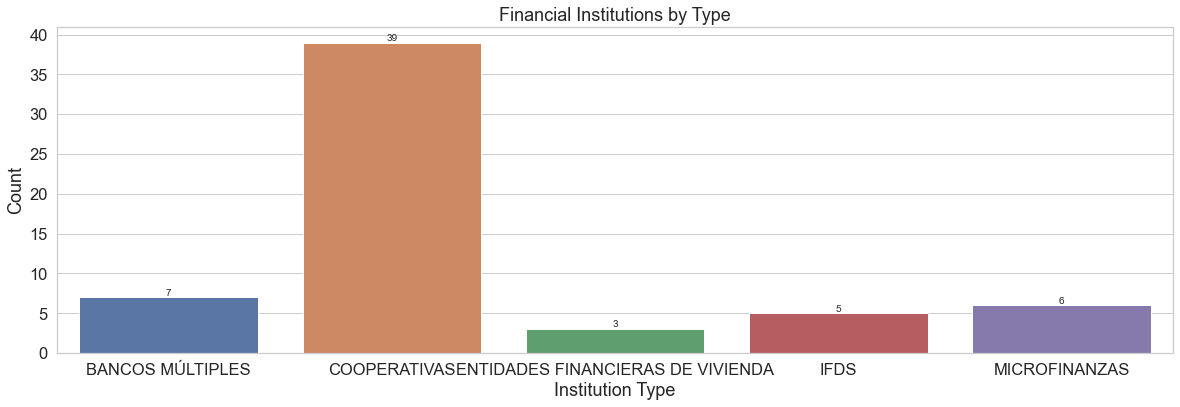

In [17]:
# Create the count plot using Seaborn
# Set the font size for the plot
sns.set(font_scale=1.5)
sns.set_style('whitegrid')  # Optional: Set a background style for the plot
plt.figure(figsize=(20, 6))
ax=sns.countplot(x=subset_df['Tipo'])

# Add labels and title
plt.xlabel('Institution Type')
plt.ylabel('Count')
plt.title('Financial Institutions by Type')
# Add data labels (counts) to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


# Show the plot
plt.show()

##### Continuous variables

Histogram of continuos variables

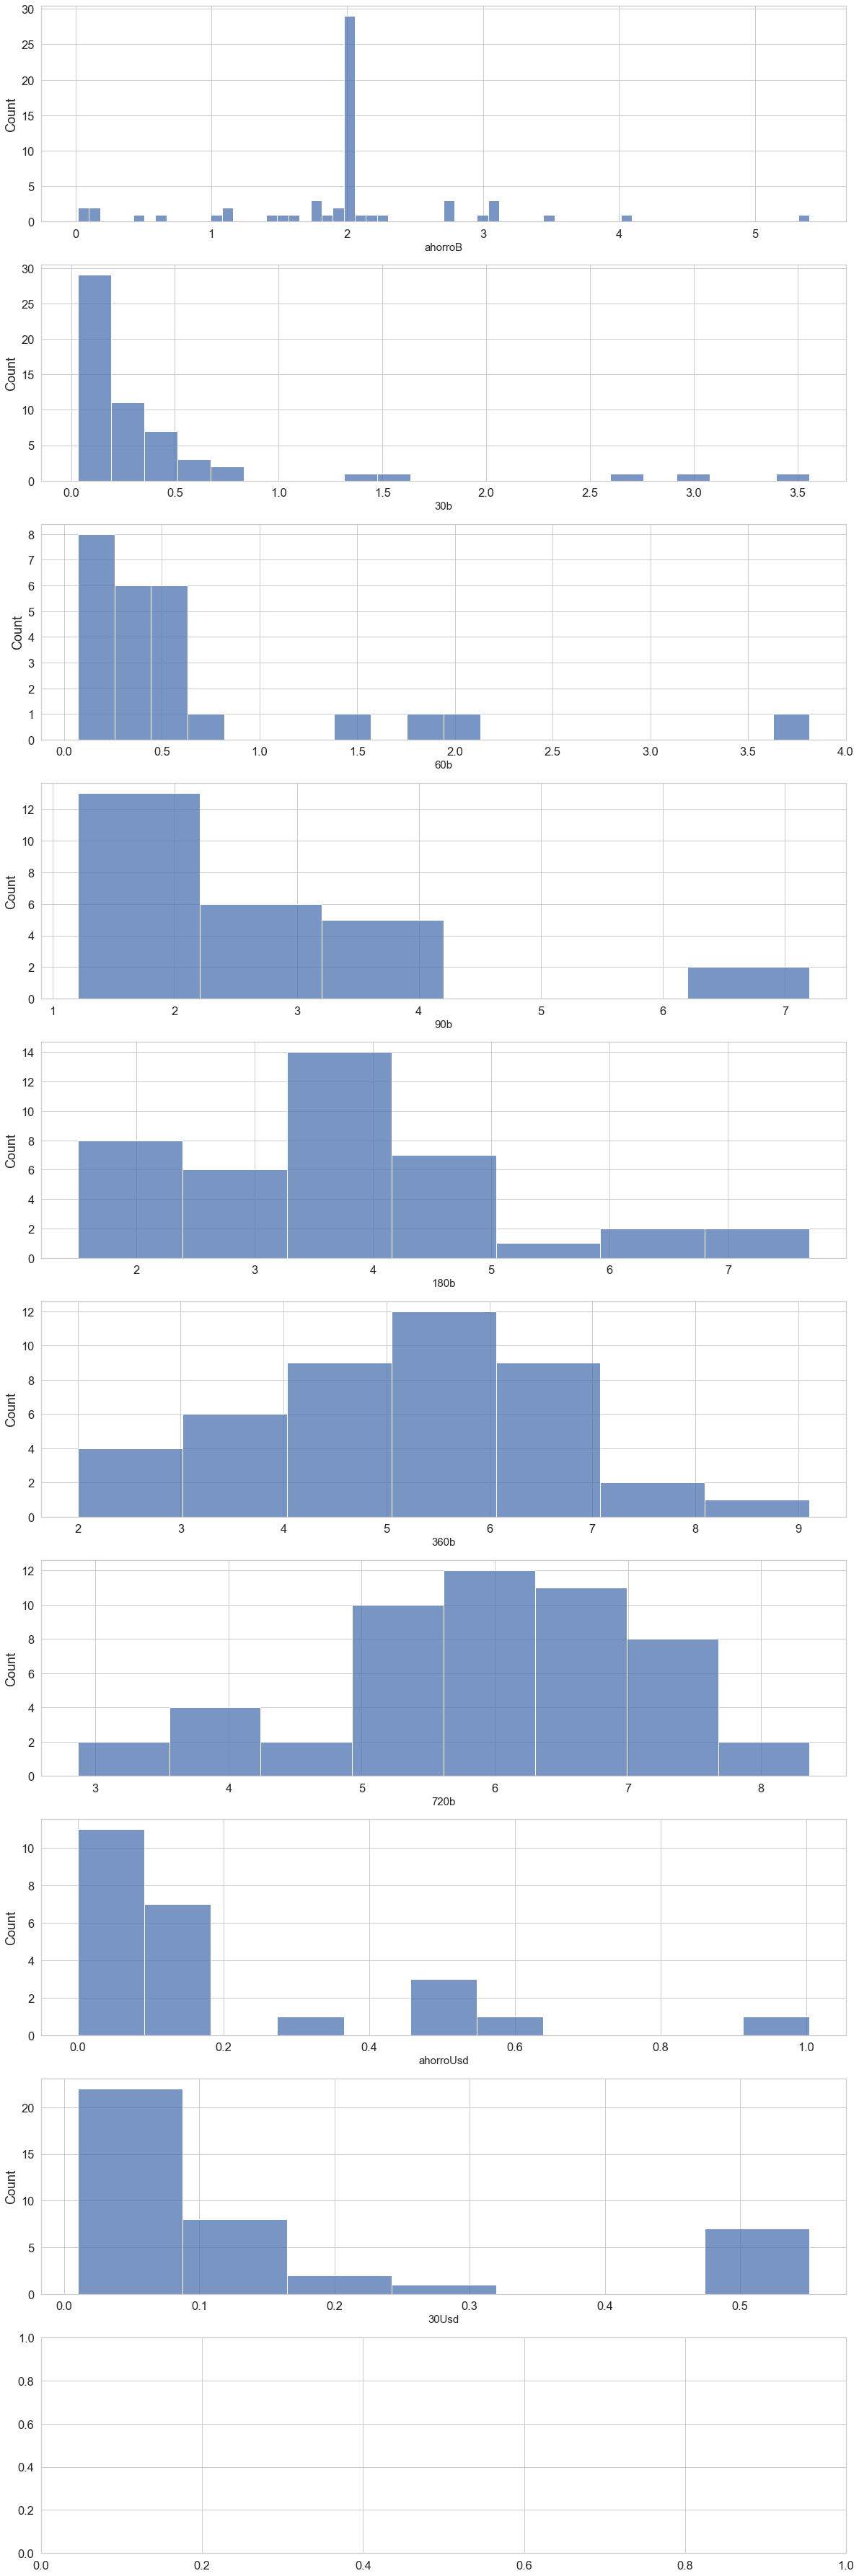

In [18]:
f, axes = plt.subplots(len(subset_df.columns), figsize=(20, 65), sharex=False) 
for i in range(len(subset_df.columns)-1):
    d = sns.histplot( subset_df[subset_df.columns[i]], ax=axes[i])
    d.set_xlabel(subset_df.columns[i],fontsize=15)

Barplot for categorical variables

In [19]:
# Reassigning the categoric value
Bs_df= df.iloc[:, :2]
Bs_df['Tipo'] = df['Tipo']

Visualizing violin plots for specific columns, categorized according to the financial institution type.

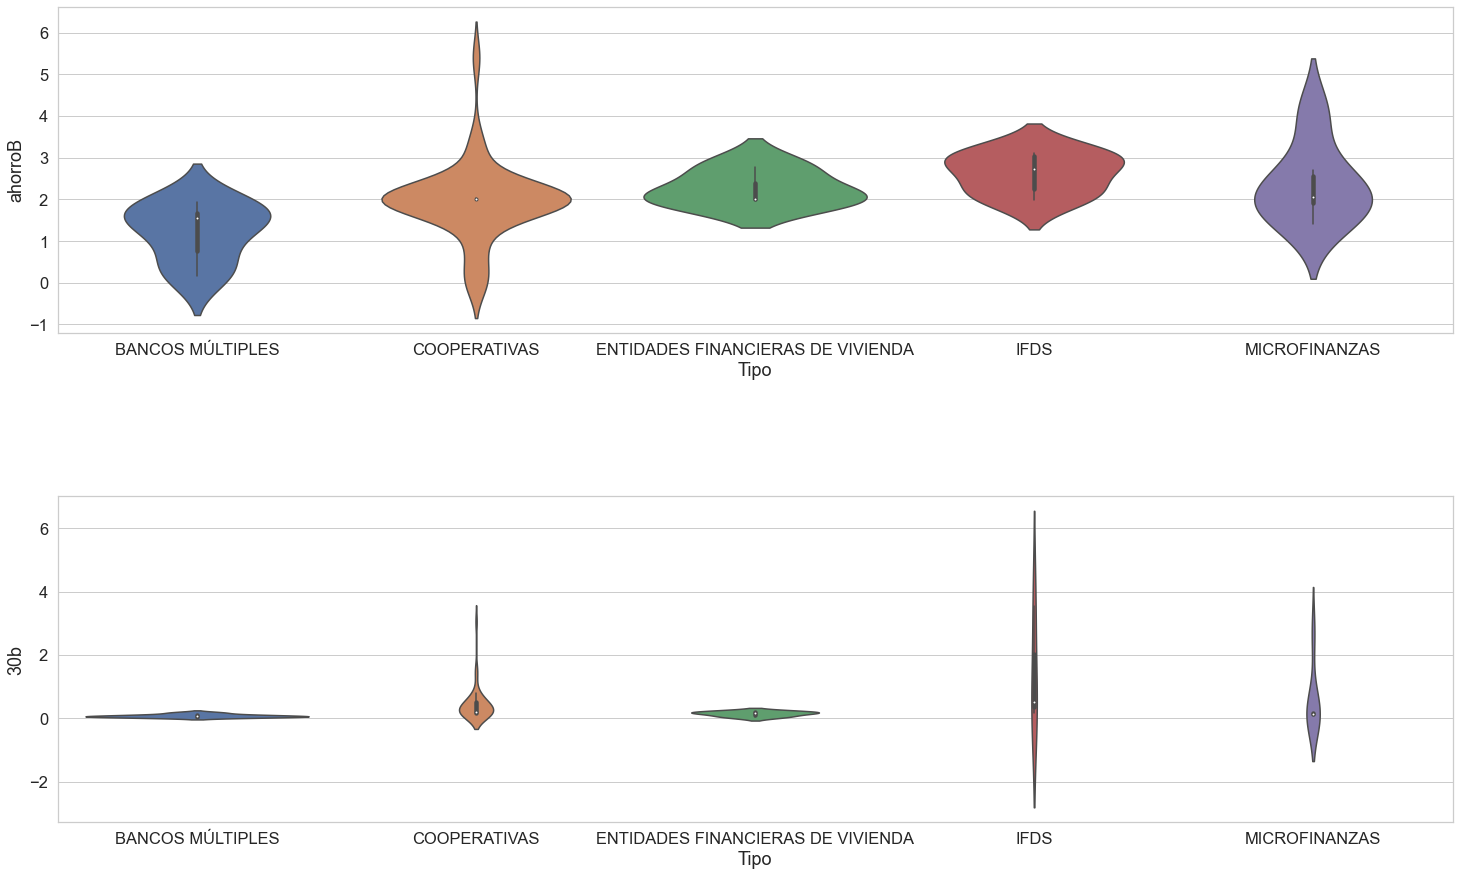

In [20]:
n_rows = 2
n_cols = 1
count = 0

plt.subplots(n_rows, n_cols, figsize=(25, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count+1)
        sns.violinplot(x="Tipo",y=Bs_df.columns[count],data=Bs_df)
        count = count+1
plt.show()

Visualizing boxplots for specific columns, categorized according to the financial institution type.

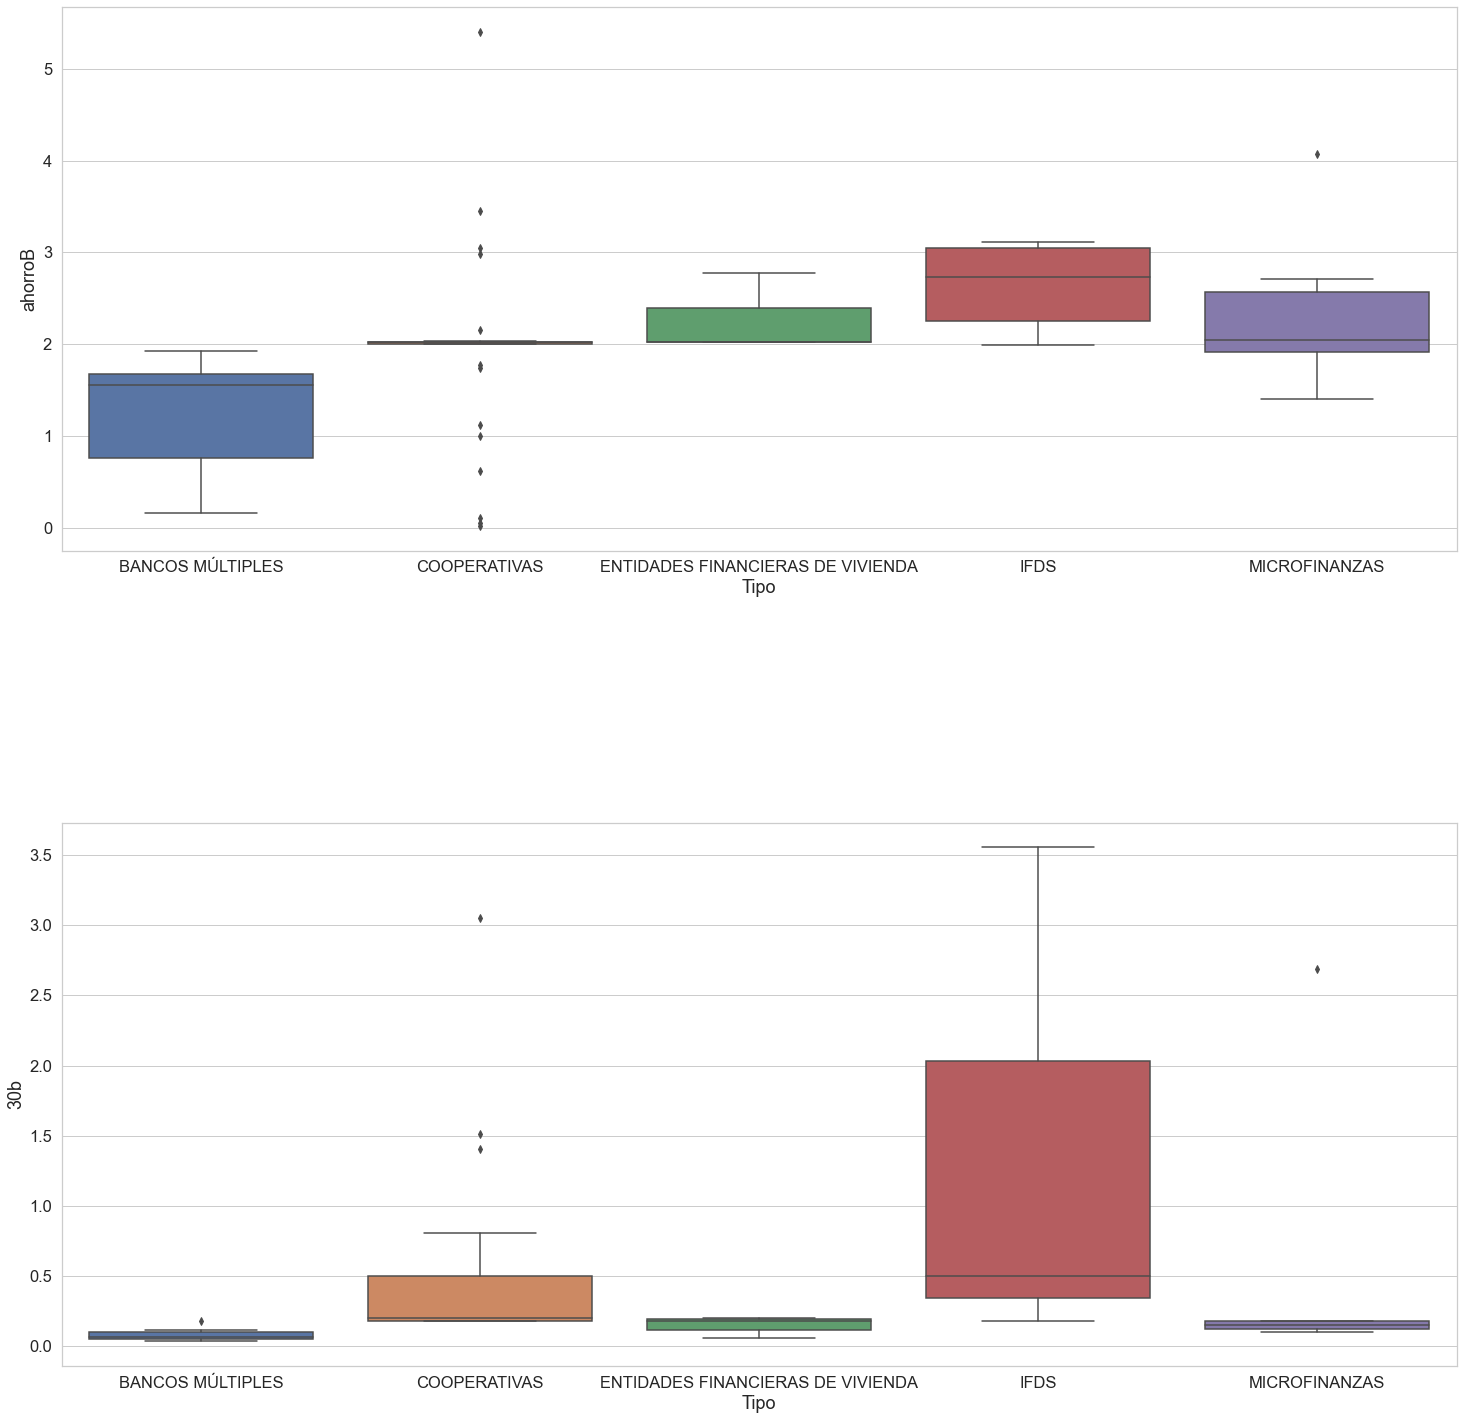

In [21]:
#sns.catplot(x="type",y="fixed acidity",kind='box',data=df_train)

n_rows = 2
n_cols = 1
count = 0

plt.subplots(n_rows, n_cols, figsize=(25, 25))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count+1)
        sns.boxplot(x="Tipo",y=Bs_df.columns[count],data=Bs_df)
        count = count+1
plt.show()



The boxplot of two variables show us the presence of outliers

##### Outlier detection
Making use of the IQR detection method

In [22]:
# Function to detect outliers using IQR method within each group
def detect_outliers_iqr_group(column):
    if column.dtype == 'object':
        return column  # For categorical columns, return as is
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

In [23]:
# Detecting outliers for each group using IQR method. example with the 360 day Fixed Deposit in Bolivianos variable
outliers_iqr_grouped = subset_df.groupby('Tipo')['360b'].apply(detect_outliers_iqr_group)

print("Outliers using IQR method, grouped by Category:")
print(outliers_iqr_grouped)

Outliers using IQR method, grouped by Category:
Tipo           Entidad  
COOPERATIVAS   LOYOLA       9.109600
MICROFINANZAS  FORTALEZA    4.271909
Name: 360b, dtype: float64


Industry knowledge: Because these are rates paid to customers, it might be more interesting to know which financial
    institutions have the highest rates, both for regulation and profit purposes

In [24]:
# Function to detect outliers using IQR method within each group
def high_outliers_iqr_group(column):
    if column.dtype == 'object':
        return column  # For categorical columns, return as is
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column > upper_bound)]

In [25]:
# Detect outliers for each group using IQR method
outliers_iqr_grouped = subset_df.groupby('Tipo')['360b'].apply(high_outliers_iqr_group)

print("Outliers using IQR method, grouped by Category:")
print(outliers_iqr_grouped)

Outliers using IQR method, grouped by Category:
Tipo          Entidad
COOPERATIVAS  LOYOLA     9.1096
Name: 360b, dtype: float64


We now know, that if the objective is to seek the highest profitability for a 1 year period, this entity pays the most.

##### Absolute Deviation of a Value

To understand how far is a value from the mean, we use the concept of absolute deviation. 
Example provided: Loyola's 360 day Fixed Deposit Rate, contrasted to the Cooperativa group mean for the same product.

In [26]:
subset_df.loc['LOYOLA','360b']

9.109599999999999

In [27]:
# Finding the group mean, given his entity type "Cooperativa".
grouped_means = df.groupby('Tipo').mean()
grouped_means.loc['COOPERATIVAS','ahorroB']


1.9457202725905693

In [28]:
abs(subset_df.loc['LOYOLA','360b']-grouped_means.loc['COOPERATIVAS','ahorroB'])

7.163879727409429